<a href="https://colab.research.google.com/github/DeepaliSaini4/Machine-Learning/blob/main/Supervised_Vs_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Housing.csv to Housing.csv
Files in directory: ['.config', 'Housing.csv', 'sample_data']
Supervised Learning (Classification) - Accuracy: 0.5963
Supervised Learning (Regression) - MSE: 1754318687330.67
Unsupervised Learning (Clustering) - Silhouette Score: 0.1279
Cluster distribution: [154 163 228]


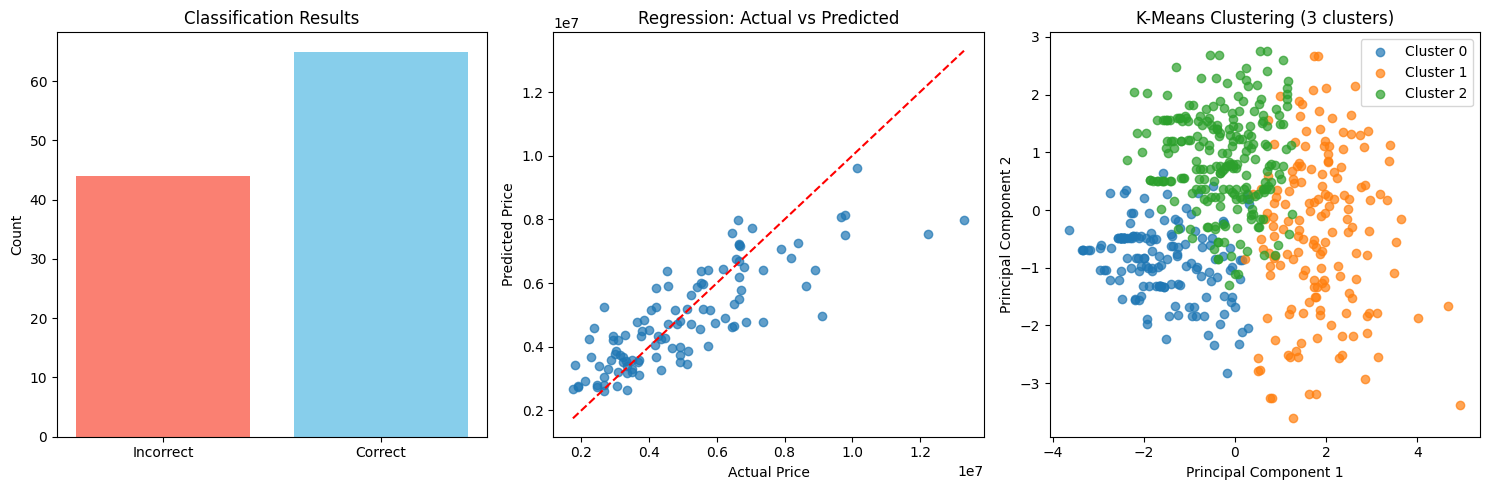

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, mean_squared_error, silhouette_score

# Upload dataset
from google.colab import files
uploaded = files.upload()  # Upload Housing.csv when prompted

# Confirm file exists
import os
print("Files in directory:", os.listdir())

# -----------------------------------------
# 1. Supervised Learning: Classification
# -----------------------------------------
# Loading housing dataset for classification
housing_df = pd.read_csv('Housing.csv')

# Preparing data for classification (create price categories)
# Converting price to categories: Low, Medium, High
q_25 = housing_df['price'].quantile(0.25)
q_75 = housing_df['price'].quantile(0.75)
housing_df['price_category'] = pd.cut(housing_df['price'],
                                    bins=[0, q_25, q_75, float('inf')],
                                    labels=['Low', 'Medium', 'High'])

# Converting categorical variables
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    housing_df[col] = housing_df[col].map({'yes': 1, 'no': 0})

housing_df = pd.get_dummies(housing_df, columns=['furnishingstatus'], drop_first=True)

# Preparing features and target for classification
X_class = housing_df.drop(['price', 'price_category'], axis=1)
y_class = housing_df['price_category']
le = LabelEncoder()
y_class = le.fit_transform(y_class)

# Spliting data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

# Training Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_class, y_train_class)

# Evaluating
y_pred_class = clf.predict(X_test_class)
classification_accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Supervised Learning (Classification) - Accuracy: {classification_accuracy:.4f}")

# -----------------------------------------
# 2. Supervised Learning: Regression
# -----------------------------------------
# Using same housing dataset for regression
X_reg = housing_df.drop(['price', 'price_category'], axis=1)
y_reg = housing_df['price']

# Spliting data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

# Standardizing features
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

# Training Linear Regression
reg = LinearRegression()
reg.fit(X_train_reg, y_train_reg)

# Evaluating
y_pred_reg = reg.predict(X_test_reg)
regression_mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Supervised Learning (Regression) - MSE: {regression_mse:.2f}")

# -----------------------------------------
# 3. Unsupervised Learning: Clustering
# -----------------------------------------
# Usinging numerical features from housing dataset for clustering
X_unsup = housing_df.drop(['price', 'price_category'], axis=1)
X_unsup = scaler.fit_transform(X_unsup)

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_unsup)

# Evaluating clustering
silhouette = silhouette_score(X_unsup, clusters)
print(f"Unsupervised Learning (Clustering) - Silhouette Score: {silhouette:.4f}")
print(f"Cluster distribution: {np.bincount(clusters)}")

# -----------------------------------------
# 4. Visualization
# -----------------------------------------
# Classification results
plt.figure(figsize=(15, 5))

# Plot 1: Decision Tree Classification Results
plt.subplot(1, 3, 1)
plt.bar(['Incorrect', 'Correct'],
        [(y_test_class != y_pred_class).sum(), (y_test_class == y_pred_class).sum()],
        color=['salmon', 'skyblue'])
plt.title('Classification Results')
plt.ylabel('Count')

# Plot 2: Regression Results
plt.subplot(1, 3, 2)
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.title('Regression: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Plot 3: Clustering Results (2D projection)
plt.subplot(1, 3, 3)
# Use PCA to reduce to 2D for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_unsup)

# Plot clusters
for i in range(3):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1],
                label=f'Cluster {i}', alpha=0.7)
plt.title('K-Means Clustering (3 clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()
